In [1]:
import pandas as pd

# Lesson 4 MINI-Project

## Task 1
Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

In [2]:
data=pd.read_csv("transaction_data.csv")

In [3]:
data.shape

(5315, 3)

In [4]:
data.dtypes

date           object
name           object
transaction    object
dtype: object

In [5]:
data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [6]:
data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


## Task 2
Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.

In [7]:
data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [8]:
data.transaction.value_counts()

transaction
successfull    3692
cancelled      1619
error             4
Name: count, dtype: int64

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='transaction', ylabel='count'>

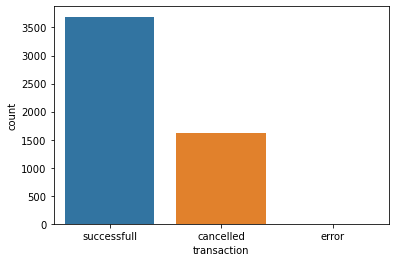

In [10]:
sns.barplot(data=data,x=data.transaction.value_counts().index,y=data.transaction.value_counts())

## Task 3
Сколько транзакций завершились ошибкой?

***4***

## Task 4
Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.

In [13]:
grop=data.query("transaction=='successfull'").groupby("name").agg({"transaction":"count"})

In [14]:
grop.head(1)

,transaction
name,
Ekaterina_Fedorova,72


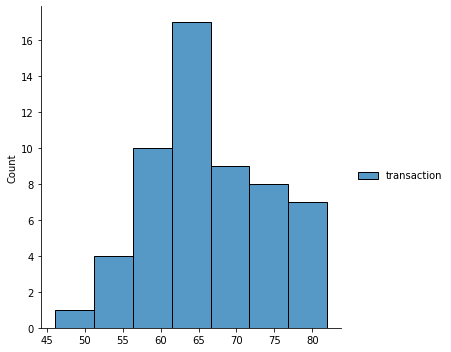

In [17]:
sns.displot(grop)

## Task 5
Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)
Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.


In [18]:
new_=pd.read_csv("transaction_data_updated.csv")

In [28]:
df=new_.query("transaction=='successfull'").\
  groupby(["name","minute"]).\
  agg({"transaction":"count"}).reset_index().rename(columns={"transaction":"orders_number"})

In [29]:
df.isna().sum()

name             0
minute           0
orders_number    0
dtype: int64

In [31]:
df.fillna(0,inplace=True)

In [35]:
user_vs_minute_pivot=new_.pivot_table(index='minute',columns='name',values='transaction',aggfunc='count')

In [37]:
user_vs_minute_pivot.fillna(0, inplace=True)

In [39]:
user_vs_minute_pivot.head(1)

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0


## Task 6
Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.

In [41]:
user_vs_minute_pivot=user_vs_minute_pivot.sum(axis=1)

<AxesSubplot:xlabel='minute'>

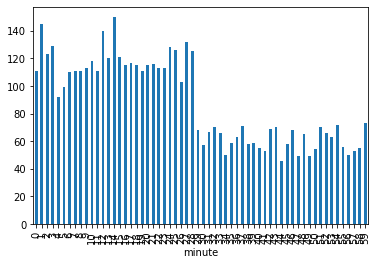

In [46]:
user_vs_minute_pivot.plot.bar()

In [48]:
data["date"]=pd.to_datetime(data["date"])

In [51]:
data["to_minute"]=data.date.dt.minute+data.date.dt.hour*60

In [52]:
data

,date,name,transaction,to_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


<AxesSubplot:xlabel='to_minute', ylabel='Count'>

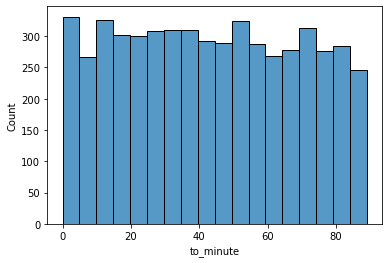

In [55]:
sns.histplot(data.to_minute)